# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Carregar a base de dados ajustada
df = pd.read_csv('demo01final.csv')  # Substitua pelo caminho correto

# Verifique se há missings e tratá-los, se necessário
if df.isnull().sum().sum() > 0:
    # Preenchendo valores ausentes, por exemplo, com a mediana ou média
    df.fillna(df.median(), inplace=True)


In [57]:
# Separação das variáveis explicativas e da variável resposta
X = df.drop('mau', axis=1)  # Substitua 'mau' pelo nome correto da sua variável resposta, se diferente
y = df['mau']

# Divisão em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=42)


In [59]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_val: {X_val.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_val: {y_val.shape}")


Dimensões de X_train: (11655, 25)
Dimensões de X_val: (4995, 25)
Dimensões de y_train: (11655,)
Dimensões de y_val: (4995,)


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [61]:
# Definir o modelo de árvore de decisão
model = DecisionTreeClassifier(random_state=42)
# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

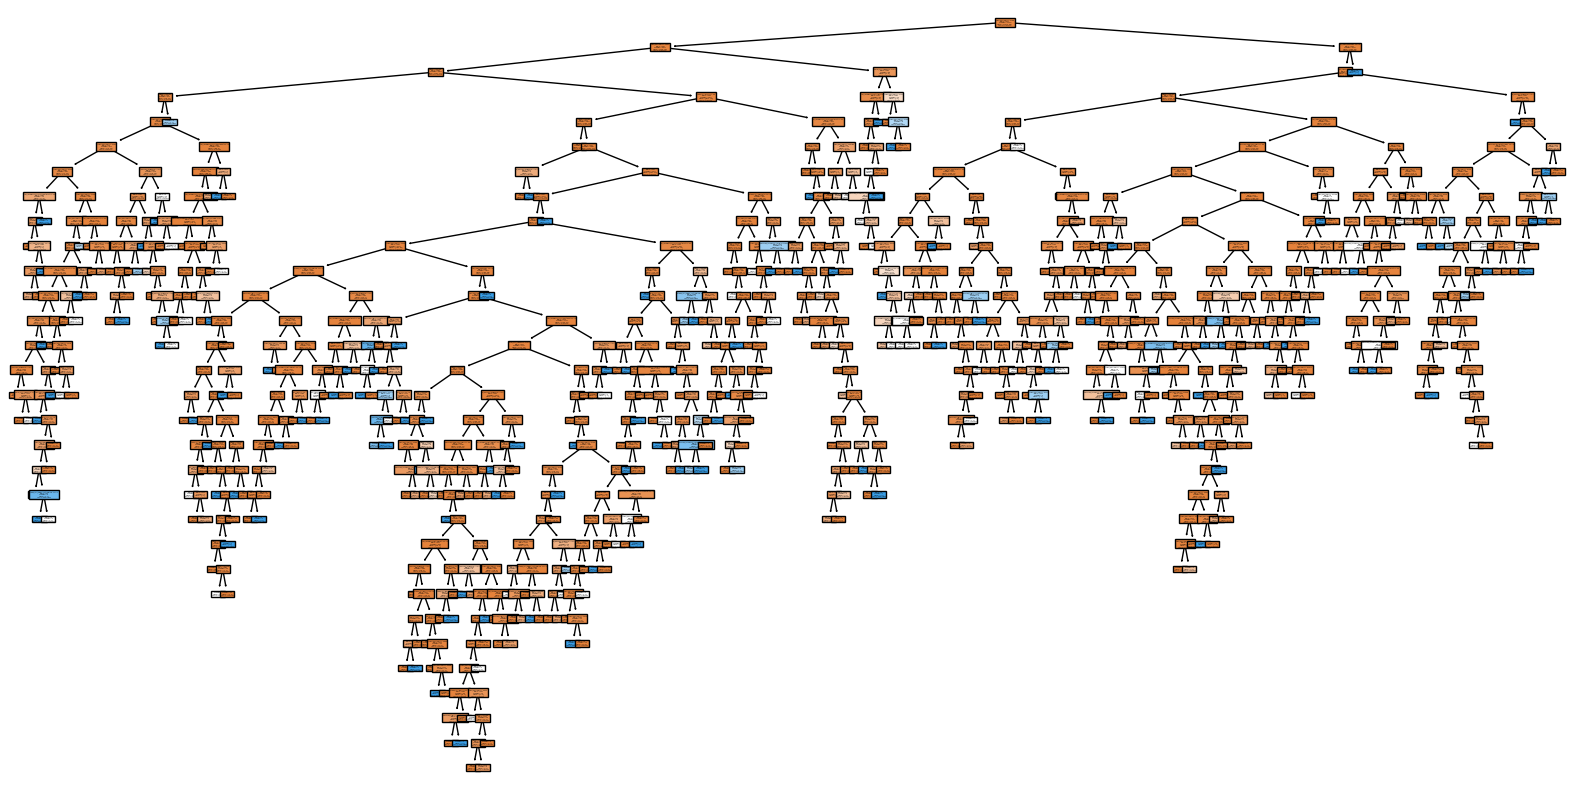

In [63]:
# Visualizar a árvore
plt.figure(figsize=(20,10))  # Aumentar o tamanho da figura para melhor visualização
plot_tree(model, filled=True, feature_names=list(X.columns), class_names=['aprovados', 'reprovados'])
plt.show()



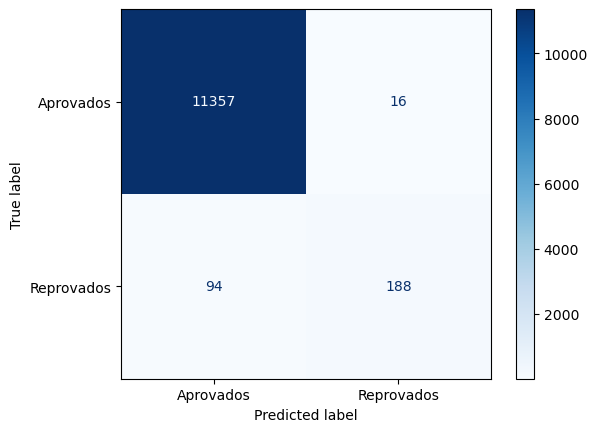

In [67]:
# Gerar as previsões para o conjunto de treinamento
y_pred = model.predict(X_train)

# Criar a matriz de confusão
cm = confusion_matrix(y_train, y_pred)

# Visualizar a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [69]:
# Prever os resultados para o conjunto de treinamento
y_train_pred = model.predict(X_train)

# Calcular a acurácia
accuracy = accuracy_score(y_train, y_train_pred)
print(f"Acurácia na base de treinamento: {accuracy:.2f}")


Acurácia na base de treinamento: 0.99


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [71]:
# Gerar previsões para o conjunto de teste
y_pred_test = model.predict(X_val)


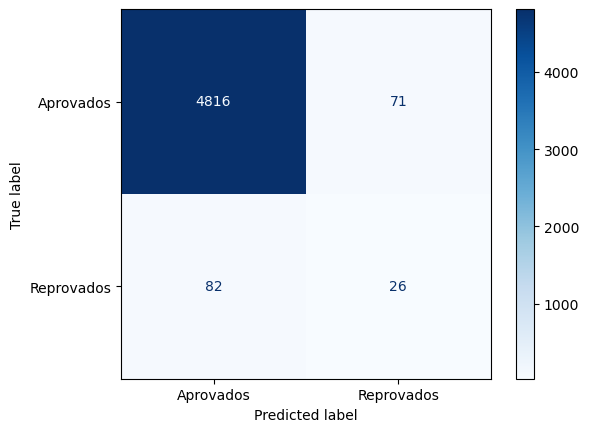

In [73]:
# Criar a matriz de confusão
cm_test = confusion_matrix(y_val, y_pred_test)

# Visualizar a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Aprovados', 'Reprovados'])
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [75]:
# Calcular a acurácia
accuracy_test = accuracy_score(y_val, y_pred_test)
print(f"Acurácia na base de teste: {accuracy_test:.2f}")


Acurácia na base de teste: 0.97


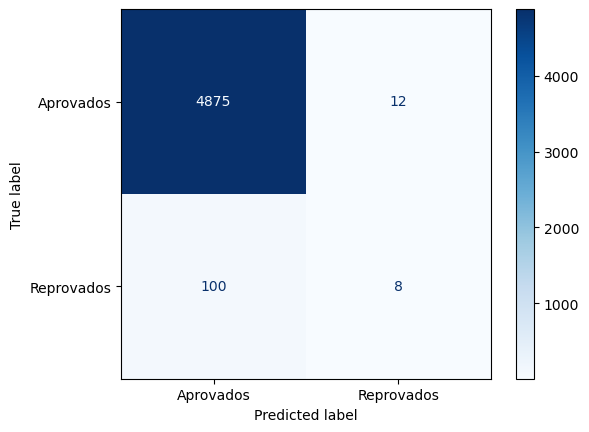

Proporção de proponentes classificados como 'maus': 0.00


In [77]:
# Definir uma nova árvore com parâmetros específicos
model_new = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
model_new.fit(X_train, y_train)

# Gerar previsões para o conjunto de teste com o novo modelo
y_pred_test_new = model_new.predict(X_val)

# Matriz de confusão para o novo modelo
cm_test_new = confusion_matrix(y_val, y_pred_test_new)
disp_new = ConfusionMatrixDisplay(confusion_matrix=cm_test_new, display_labels=['Aprovados', 'Reprovados'])
disp_new.plot(cmap=plt.cm.Blues)
plt.show()

# Proporção de proponentes classificados como 'maus'
maus_proporcao = (y_pred_test_new == 1).mean()
print(f"Proporção de proponentes classificados como 'maus': {maus_proporcao:.2f}")


In [79]:
# Calcular acurácia se todos fossem classificados como 'bons' (0)
y_all_good = [0] * len(y_val)  # Criar uma lista de zeros (todos classificados como bons)
accuracy_all_good = accuracy_score(y_val, y_all_good)
print(f"Acurácia se todos os contratos fossem classificados como bons: {accuracy_all_good:.2f}")


Acurácia se todos os contratos fossem classificados como bons: 0.98
